# Context

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
- The objective is to predict based on diagnostic measurements whether a patient has diabetes.


### Content

- Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)


### Import relevant libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


### Get Data


In [2]:
raw_data = pd.read_csv('diabetes.csv')
raw_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:

num_duplicates = raw_data.duplicated().sum()
print(num_duplicates)# we have no missing values
# we have no duplicates
# we now check for outliers

0


### Check for outliers


In [5]:
def plot_box(column):
    plt.figure(figsize=(5, 6))
    sns.boxplot(data=raw_data[column])
    plt.title('Box Plot of Selected Diabetes Dataset Features')
    plt.xticks(rotation=45)
    plt.show()
    
def remove_outliers(column, high = True, low = True):
    global raw_data
    Q1 = raw_data[column].quantile(0.25)
    Q3 = raw_data[column].quantile(0.75)
    IQR = Q3 - Q1
    if high:
        raw_data = raw_data[ raw_data[column] <= Q3 + 1.5 * IQR ]
    if low:
        raw_data = raw_data[ raw_data[column] >= Q1 - 1.5 * IQR ] 

#### 1. pregnancies


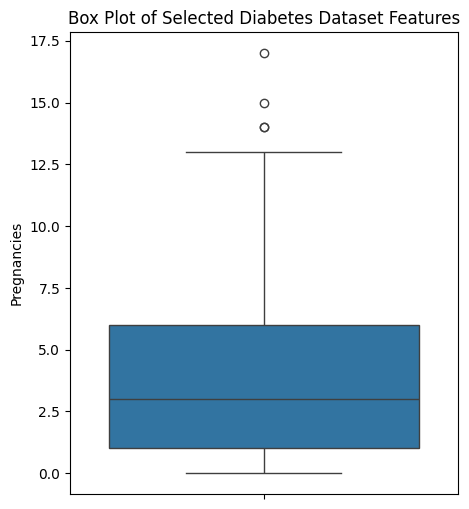

In [6]:
plot_box('Pregnancies')

##### 2. Glucose


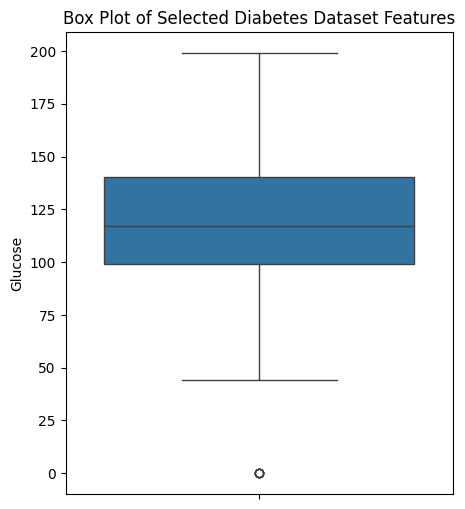

In [7]:
plot_box('Glucose')

# glucose level of 0, is surely a placeholder
remove_outliers('Glucose')

##### 3. Age


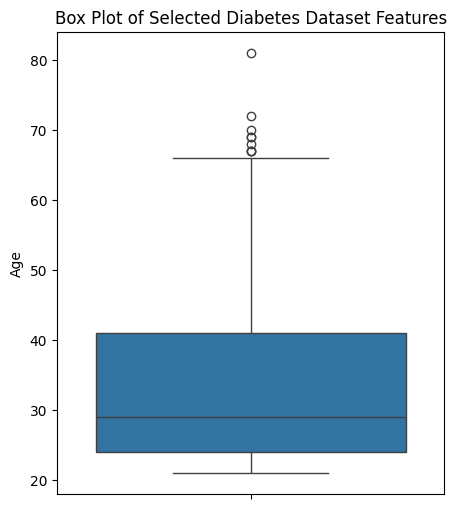

In [8]:
plot_box('Age')
# we have acceptable range
# we convert this data into bins of range 5

bins = range(min(raw_data['Age']), max(raw_data['Age']) + 11, 10)
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]


raw_data['AgeGroup'] = pd.cut(raw_data['Age'], bins=bins, labels=labels, right=False)


##### 4. BloodPressure


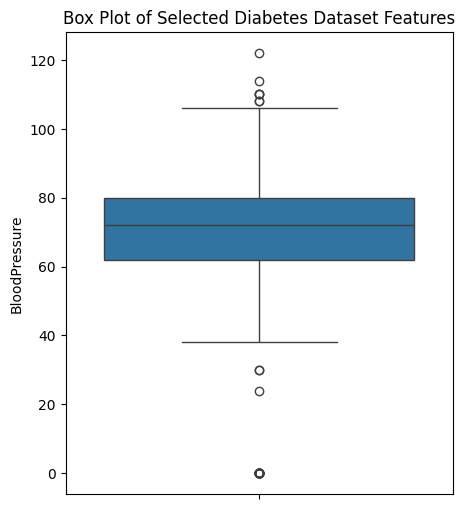

Total number of 0 blood pressure records :  35


In [9]:
plot_box('BloodPressure')
num = len(raw_data[ raw_data['BloodPressure'] == 0 ])
print('Total number of 0 blood pressure records : ', num)

In [11]:
# we assign blood pressure as per the average age groups:

# none 0 blood pressure data
filtered_data = raw_data[ raw_data['BloodPressure'] != 0]
avg_bp_by_age = filtered_data.groupby('AgeGroup', observed=False)['BloodPressure'].mean().reset_index()
avg_bp_by_age['BloodPressure'] = avg_bp_by_age['BloodPressure'].fillna( avg_bp_by_age['BloodPressure'].mean())

# Create a mapping dictionary from avg_bp_by_age
avg_bp_map = dict(zip(avg_bp_by_age['AgeGroup'], avg_bp_by_age['BloodPressure']))

# Fill 'BloodPressure' values in raw_data where it is 0 using map
raw_data['BloodPressure'] = raw_data['BloodPressure'].replace(0, np.nan).fillna(raw_data['AgeGroup'].map(avg_bp_map)).fillna(raw_data['BloodPressure'])

##### 5. SkinThickness


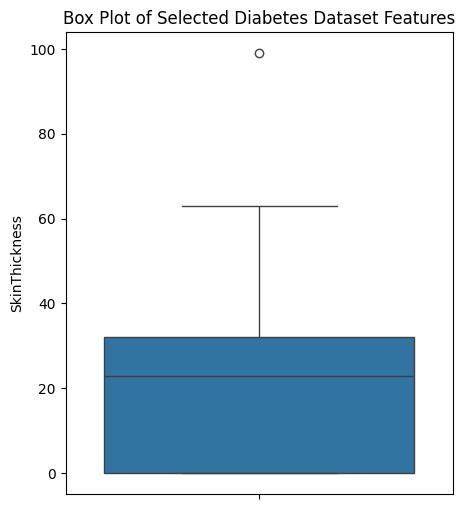

Skin Thickness value 0, count:  227


In [ ]:
plot_box('SkinThickness')
remove_outliers('SkinThickness', low = False)

# we will consider skin thickness values of 0 as placeholder and replace them with corresponding mean value in that age group
print('Skin Thickness value 0, count: ', raw_data['SkinThickness'].eq(0).sum())

avg_SkinThick_by_age = filtered_data.groupby('AgeGroup', observed=False)['SkinThickness'].mean().reset_index()
avg_SkinThick_by_age['SkinThickness'] = avg_SkinThick_by_age['SkinThickness'].replace(0, np.nan).fillna( avg_SkinThick_by_age['SkinThickness'].mean())

# Create a mapping dictionary from avg_bp_by_age
avg_SkinThickness_map = dict(zip(avg_SkinThick_by_age['AgeGroup'], avg_SkinThick_by_age['SkinThickness']))

# Fill 'BloodPressure' values in raw_data where it is 0 using map
raw_data['SkinThickness'] = raw_data['SkinThickness'].replace(0, np.nan).fillna(raw_data['AgeGroup'].map(avg_SkinThickness_map)).fillna(raw_data['SkinThickness'])



In [ ]:
avg_SkinThick_by_age

,AgeGroup,SkinThickness
0,21-25,23.063745
1,26-30,22.709220
2,31-35,21.142857
3,36-40,22.042254
4,41-45,19.239437
5,46-50,20.378378
6,51-55,16.322581
7,56-60,18.695652
8,61-65,20.000000
9,66-70,1.636364


##### 6. Insulin


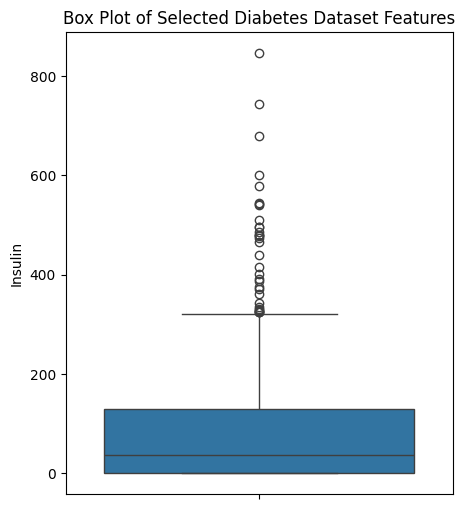

In [ ]:
plot_box('Insulin')

# insulin value have a greater range from 0 to above 800
# we try to not remove such outliers as 'insulin' level is more prominent in our prediction
# remove such outliers may hinder some potential insights

##### 7. BMI


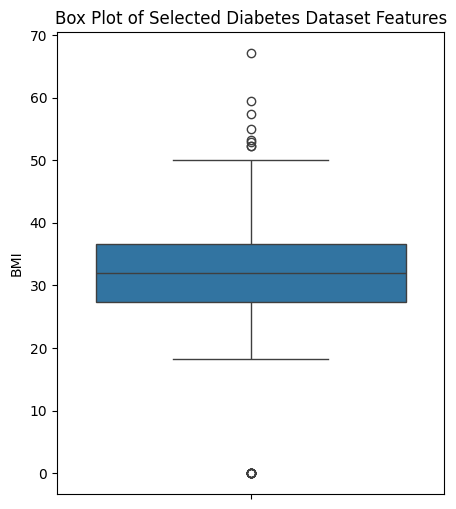

11

In [ ]:
plot_box('BMI')

# BMI of 0 is surely a placeholder, so we replacve it with mean of that particular age group
raw_data['BMI'].eq(0).sum()

In [ ]:
avg_bmi_by_age = filtered_data.groupby('AgeGroup', observed=False)['BMI'].mean().reset_index()
avg_bmi_by_age['BMI'] = avg_bmi_by_age['BMI'].replace(0, np.nan).fillna( avg_bmi_by_age['BMI'].mean())

# Create a mapping dictionary from avg_bp_by_age
avg_bmi_map = dict(zip(avg_bmi_by_age['AgeGroup'], avg_bmi_by_age['BMI']))

# Fill 'BloodPressure' values in raw_data where it is 0 using map
raw_data['BMI'] = raw_data['BMI'].replace(0, np.nan).fillna(raw_data['AgeGroup'].map(avg_bmi_map)).fillna(raw_data['BMI'])

##### DiabetesPedigreeFunction


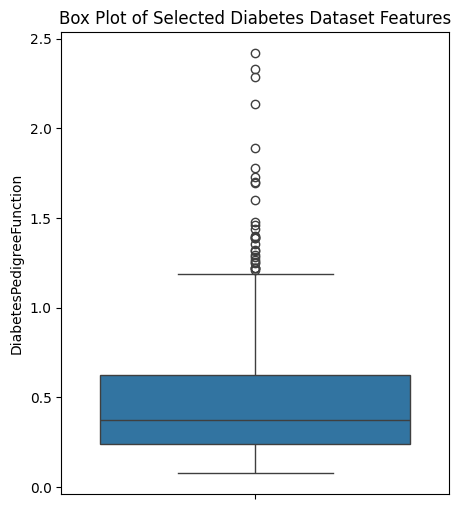

In [ ]:
plot_box('DiabetesPedigreeFunction')
# we decide to not remove outliers as DiabetesPedigreeFunction shows a numeric score used to assess the genetic predisposition to diabetes based on family history

In [ ]:
raw_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-25
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264
mean,3.854331,121.587927,72.397640,26.436462,80.397638,32.434335,0.472343,33.233596,0.347769,NaN
std,3.376278,30.433327,12.134238,9.623296,115.496566,6.886588,0.332161,11.733709,0.476575,NaN
min,0.000000,44.000000,24.000000,1.636364,0.000000,18.200000,0.078000,21.000000,0.000000,NaN
25%,1.000000,99.000000,64.000000,20.000000,0.000000,27.500000,0.243250,24.000000,0.000000,NaN
50%,3.000000,117.000000,72.000000,23.063745,36.000000,32.050000,0.372500,29.000000,0.000000,NaN
75%,6.000000,140.750000,80.000000,32.000000,128.750000,36.575000,0.626750,41.000000,1.000000,NaN


### Normalize the dataset


In [ ]:
numericals_columns = raw_data.drop('AgeGroup', axis=1).columns
scaler = MinMaxScaler()
raw_data[numericals_columns] = scaler.fit_transform(raw_data[numericals_columns])

### Drop AgeGroup


In [ ]:
# Encoded_data.describe(include= 'all')
data = raw_data.drop('AgeGroup', axis = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.543704,0.000000,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.445926,0.000000,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.317884,0.000000,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.348148,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.543704,0.198582,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.755556,0.212766,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.413333,0.000000,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.348148,0.132388,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.305425,0.000000,0.243354,0.115713,0.433333,1.0


### Split Features and Targets


In [ ]:
target = data['Outcome']
features = data.drop('Outcome', axis = 1)

features_array = features.values
target_array = target.values

### Split into training and testing dataset


In [ ]:
# First, split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features_array, target_array, test_size=0.1, random_state=42)

# Now split the training+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Print the sum and the mean of the targets in each set
print("Training set:")
print(f"Sum: {np.sum(y_train)}, Count: {len(y_train)}, Mean: {np.mean(y_train)}")

print("\nValidation set:")
print(f"Sum: {np.sum(y_val)}, Count: {len(y_val)}, Mean: {np.mean(y_val)}")

print("\nTest set:")
print(f"Sum: {np.sum(y_test)}, Count: {len(y_test)}, Mean: {np.mean(y_test)}")

Training set:
Sum: 212.0, Count: 599, Mean: 0.35392320534223703

Validation set:
Sum: 27.0, Count: 86, Mean: 0.313953488372093

Test set:
Sum: 26.0, Count: 77, Mean: 0.33766233766233766


### Now we save our data into npz file


In [ ]:
np.savez('train_data',inputs = X_train,targets = y_train)
np.savez('validation_data',inputs = X_val,targets = y_val)
np.savez('test_data',inputs = X_test,targets = y_test)